In [32]:
%reload_ext autoreload
%autoreload 2
from functions import *

# Downloading Kaggle Dataset

In [ ]:
!pip install kagglehub

In [2]:
# Download to default location
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
print("Downloaded to:", path)

# Create data directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Move files to your desired location (cut, not copy)
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), f"./data/{file}")
    
print("Files moved to ./data/")

# Optionally, remove the empty download directory
try:
    os.rmdir(path)
    print("Cleaned up empty download directory")
except OSError:
    print("Download directory not empty or couldn't be removed")

100%|██████████| 11.2M/11.2M [00:03<00:00, 3.41MB/s]

Extracting files...


Downloaded to: /Users/omar/.cache/kagglehub/datasets/uciml/forest-cover-type-dataset/versions/1
Files moved to ./data/
Cleaned up empty download directory



# Intial look on the data

In [3]:
# Load the dataset
df = pd.read_csv('./data/covtype.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (581012, 55)

First few rows:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
# Clean all column names by removing leading/trailing spaces 
# Because some columns have leading/trailing spaces which is annoying
# df.columns = df.columns.str.strip()

In [4]:
# Basic info about the dataset
print("Dataset info:")
df.info()
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
df.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    58

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# 1 - Exploratory Data Analysis (EDA)

In [6]:
df_analysis = df.copy()

In [8]:
correlation_matrix_numeric = df_analysis.corr(numeric_only=True)
print(f"number of numeric columns: {len(correlation_matrix_numeric)}")
print(f"number of categorical columns: {len(df_analysis.columns)- len(correlation_matrix_numeric)}")

number of numeric columns: 55
number of categorical columns: 0


# 1.1 Visualizing Cols

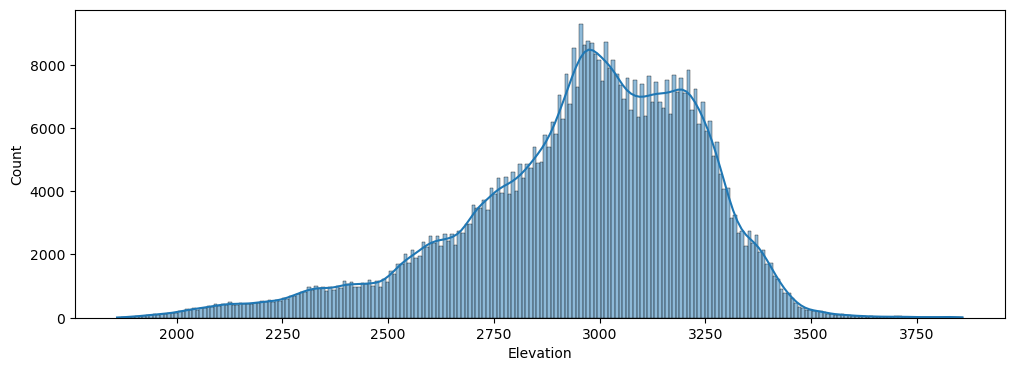

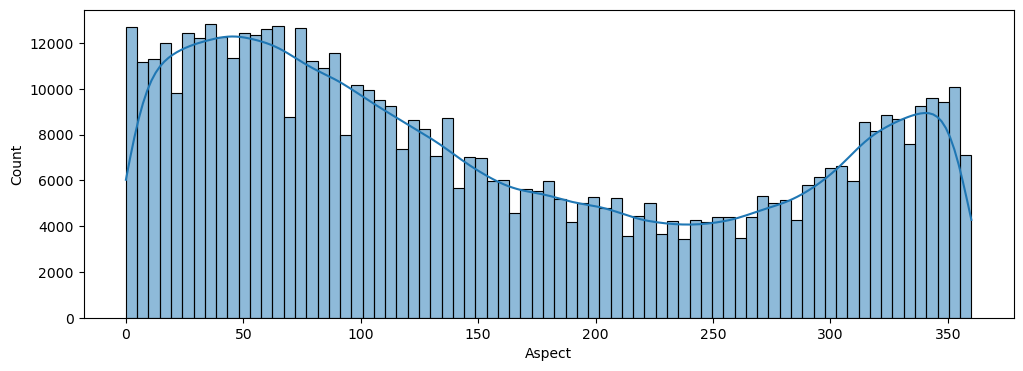

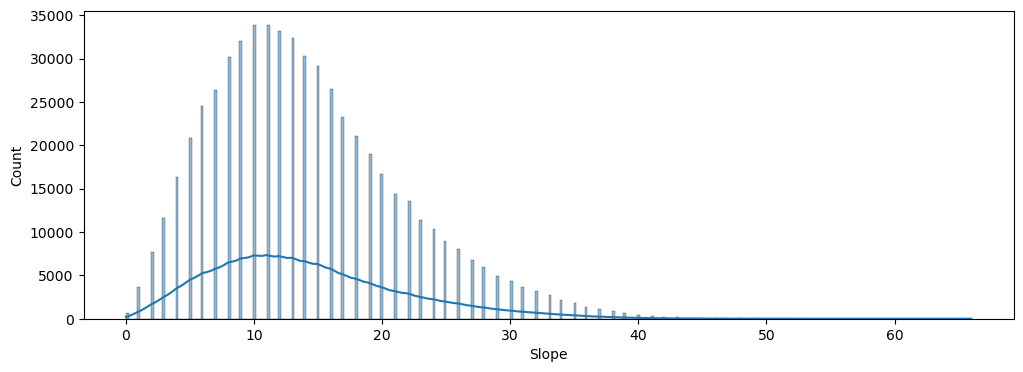

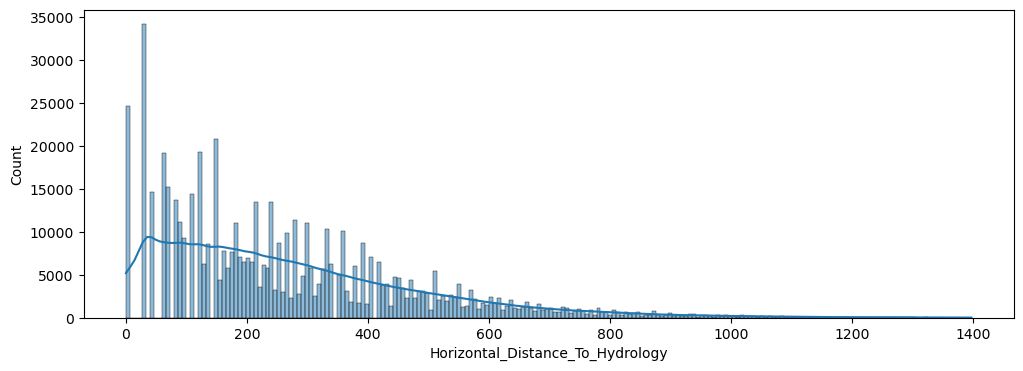

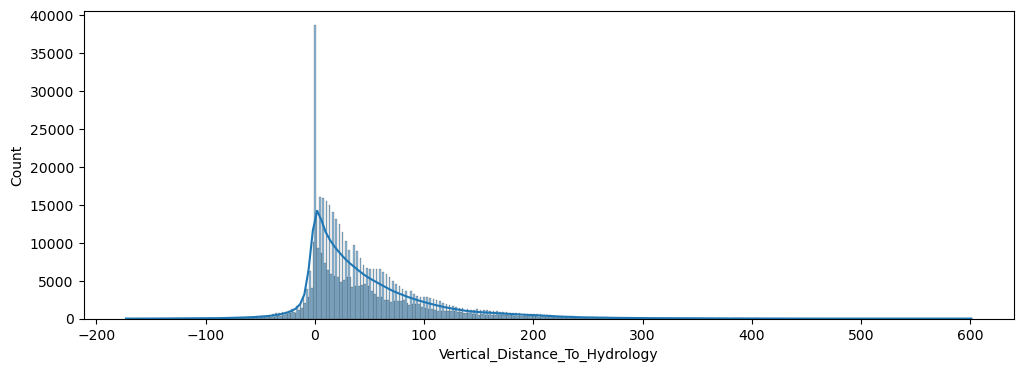

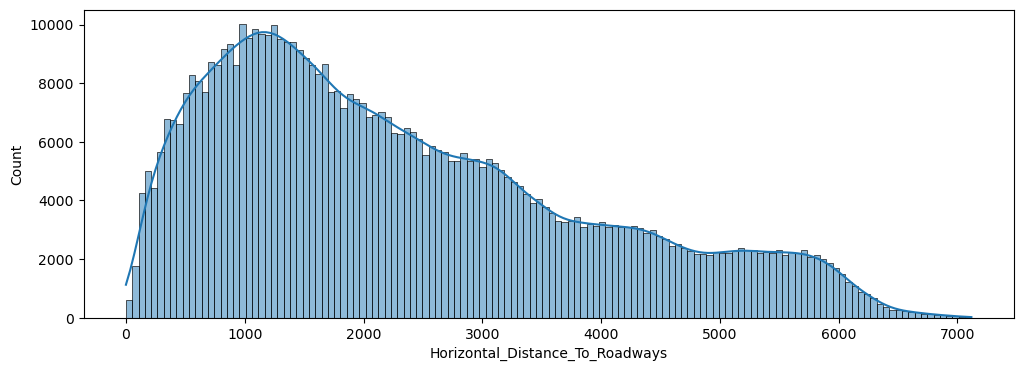

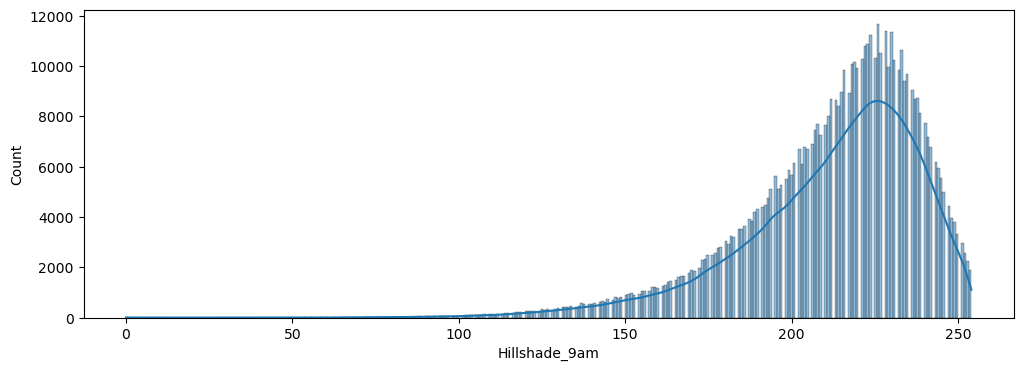

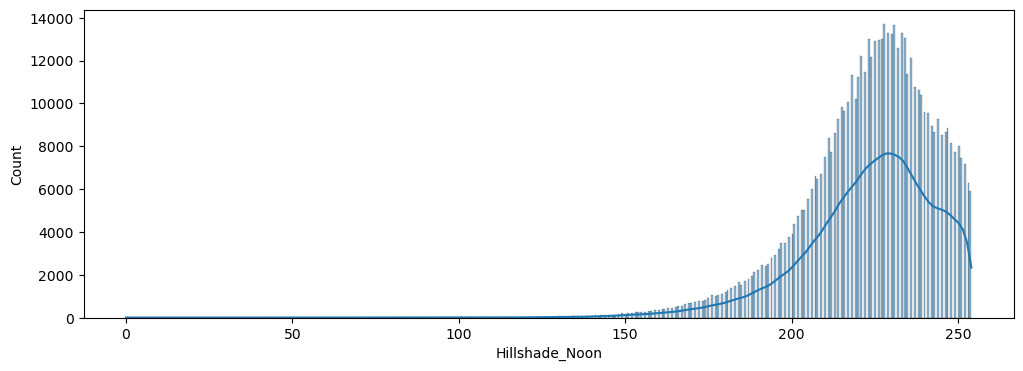

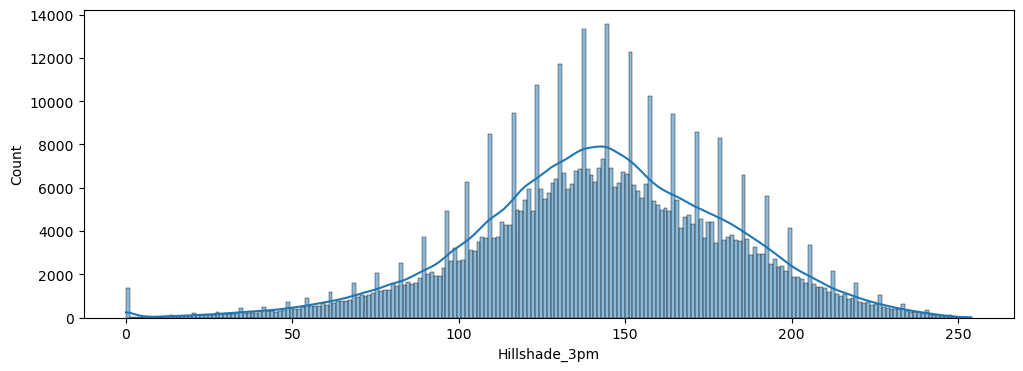

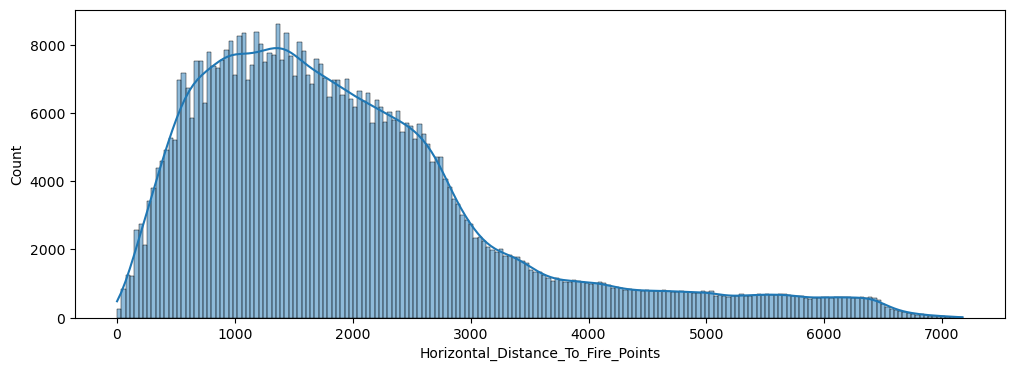

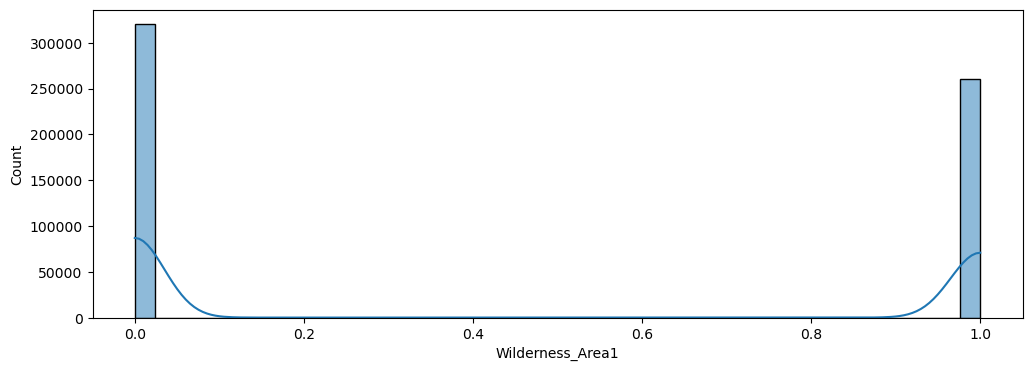

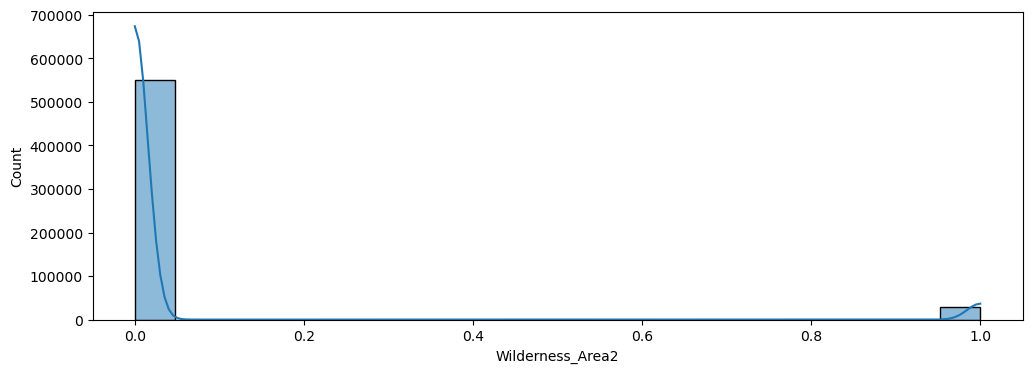

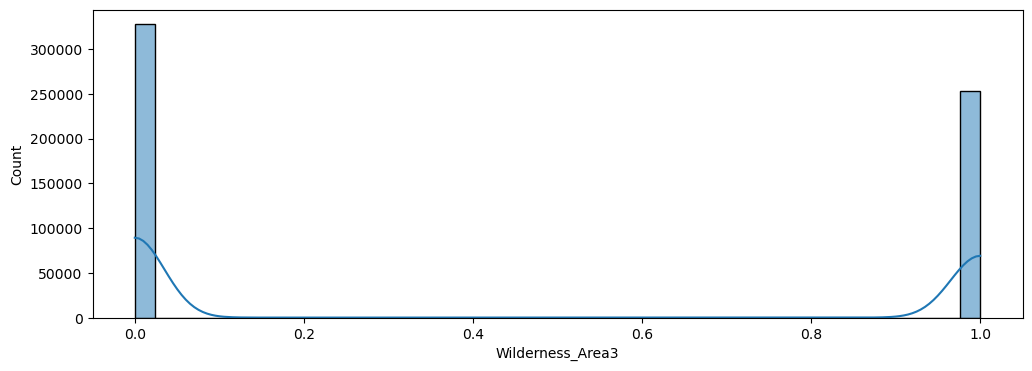

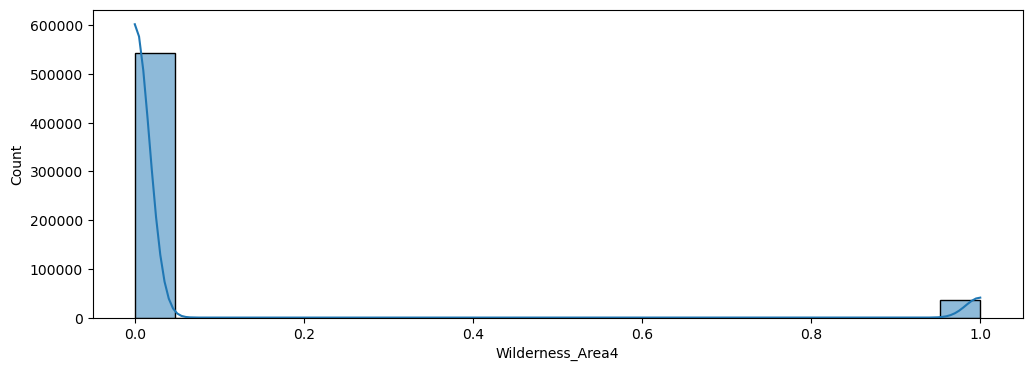

In [ ]:
# Only plot numerical columns
for col in df_analysis.columns:
    # exclude 'Cover_Type' because it's the target variable and exclude 'Soil_Type' columns
    if df_analysis[col].dtype != 'O' and col != 'Cover_Type' and col != '' and not col.lower().startswith('soil_type'): 
        plt.figure(figsize=(12, 4))
        sns.histplot(df_analysis[col],kde=True)
        plt.show()

# the 40 cols of soil type are all already one-hot encoded

/var/folders/77/n_9rqs5n2hq31dqwm43rln840000gn/T/ipykernel_28338/2237424337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cover_Type', y='Elevation', palette='Set2')


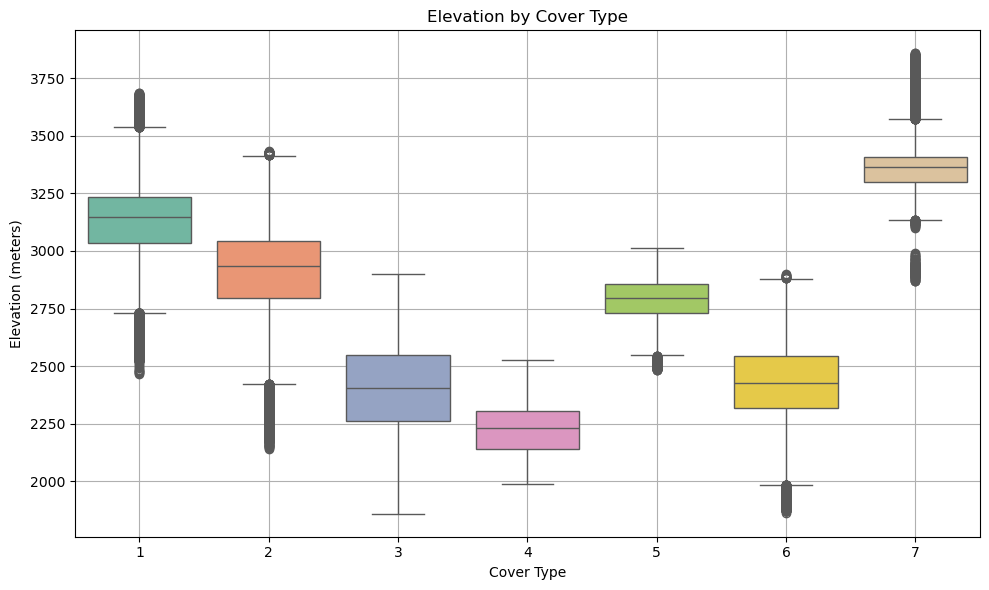

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cover_Type', y='Elevation', palette='Set2')
plt.title('Elevation by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation (meters)')
plt.grid(True)
plt.tight_layout()
plt.show()

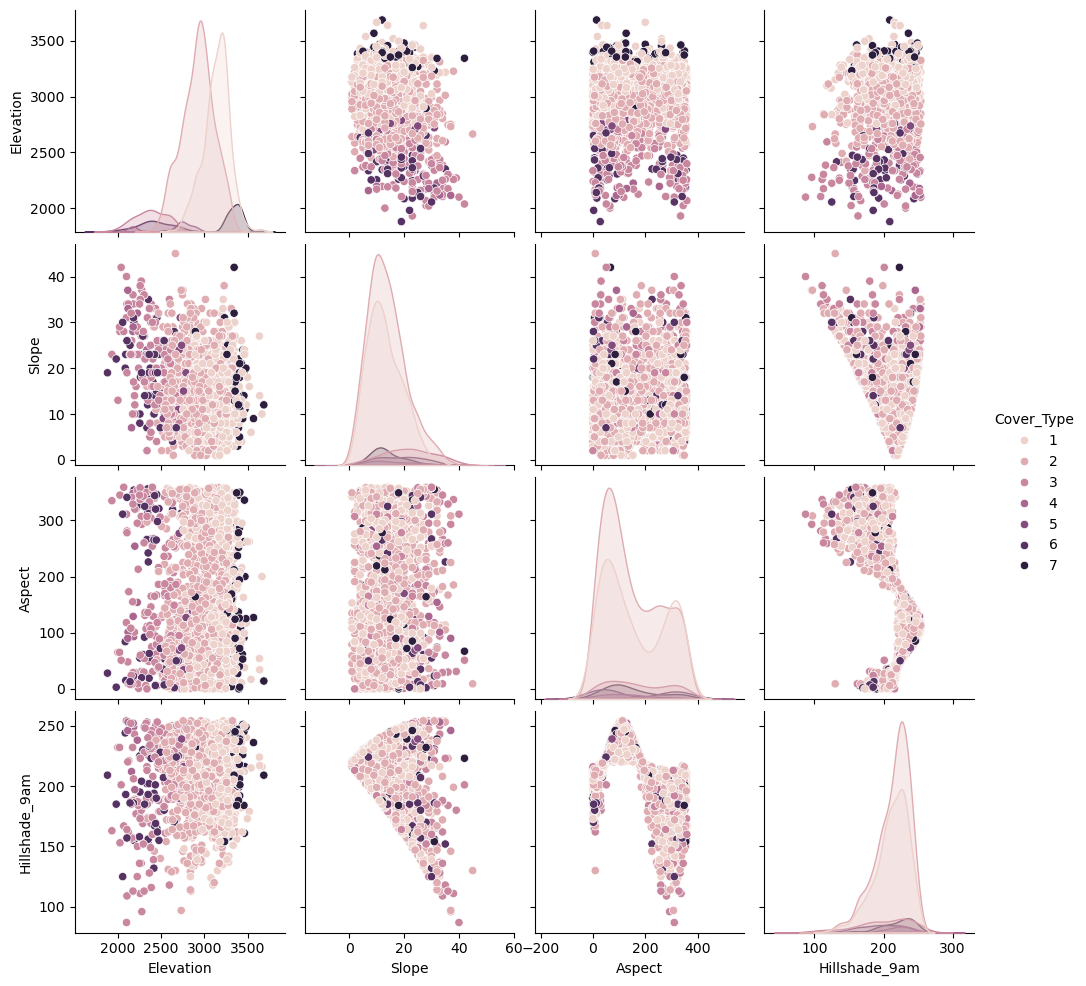

In [ ]:
sns.pairplot(df.sample(2000)[['Elevation', 'Slope', 'Aspect', 'Hillshade_9am', 'Cover_Type']], hue='Cover_Type')

# 1.2 Heat map

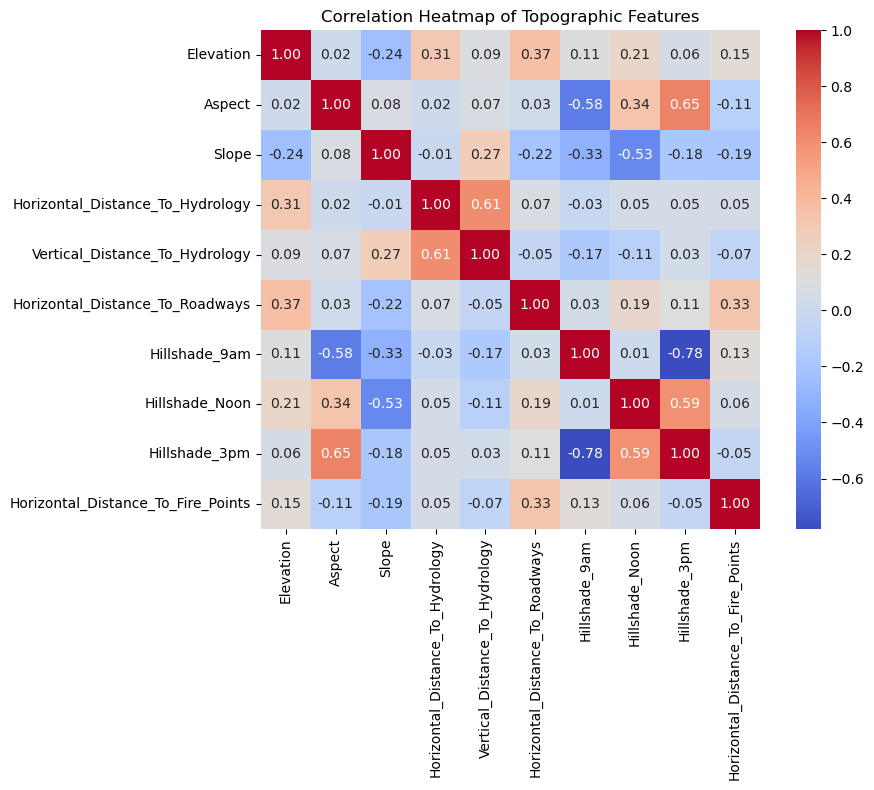

In [15]:
topo_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

plt.figure(figsize=(10, 8))
corr_matrix = df[topo_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Topographic Features')
plt.tight_layout()
plt.show()

# 1.3 Target distribution -> do we have unbalnced target?

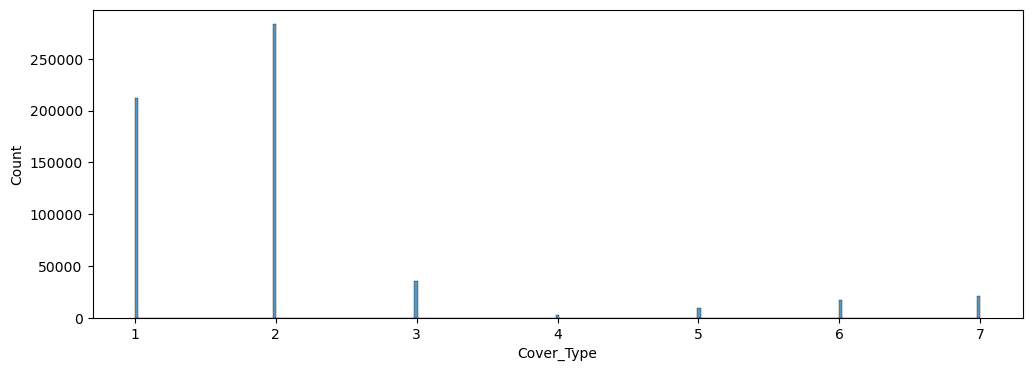

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(df_analysis['Cover_Type'],kde=False)
plt.show()

# Since target isn't balanced, we will try to add balancing while building the model

# 2 - Data cleaning & Pre-processing

In [19]:
df_clean = df.copy()

# 2.1 Duplicate data

In [20]:
# Check for duplicates
print(f"\nDuplicate rows in data frame: {df_clean.duplicated().sum()}")


Duplicate rows in data frame: 0


# 2.2 Missing Data (NAN values)

In [21]:
# Check for missing values
print(f"Missing values in data frame: {df.isnull().sum()}")

# when solving missing values we need to split the data into train and test sets to ensure no data leakage

Missing values in data frame: Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type1

# 2.3 Outlier detection (z-score)

In [ ]:
# # Removing outliers from dataset based on the Z-score method -> data lekage?
# print("Shape before removing outliers:", df_clean.shape)

# z = np.abs((df_clean - df_clean.mean()) / df_clean.std())
# threshold = 3
# df_clean = df_clean[(z < threshold).all(axis=1)]

# print(f"Shape after removing outliers: {df_clean.shape}") 

# 3 Model Building

In [22]:
X = df_clean.drop(columns=['Cover_Type'])
y = df_clean['Cover_Type']

In [23]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


# 3.1 Random forest


RANDOM FOREST EVALUATION RESULTS (train set)
Training Accuracy:  1.0000
Training Precision: 1.0000
Training Recall:    1.0000
Training F1-Score:  1.0000

RANDOM FOREST EVALUATION RESULTS (test set)
Accuracy:  0.9533
Precision: 0.9463
Recall:    0.9053
F1-Score:  0.9241

Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203


Confusion Matrix:
[[39889  2376     1     0     6     2    94]
 [ 1300 55120   104     1    54    

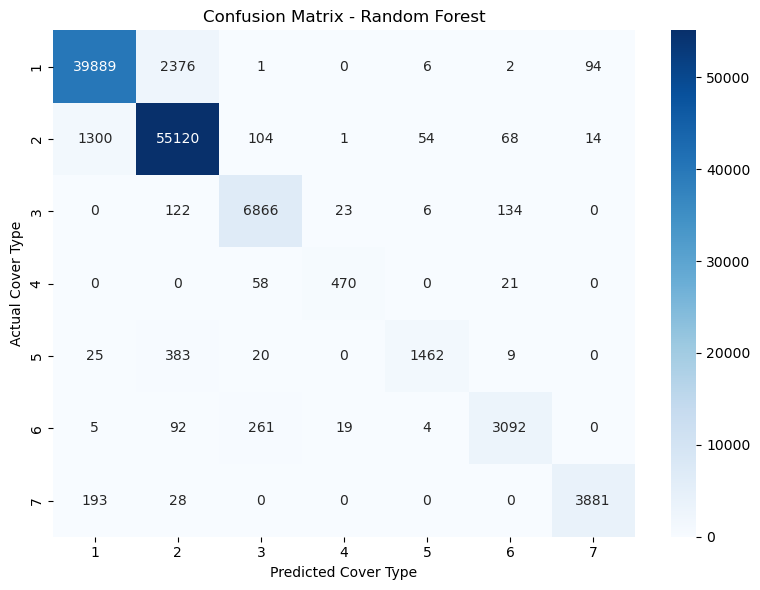


Top 15 Feature Importances:
                               feature  importance
0                            Elevation    0.240072
5      Horizontal_Distance_To_Roadways    0.118071
9   Horizontal_Distance_To_Fire_Points    0.110950
3     Horizontal_Distance_To_Hydrology    0.060759
4       Vertical_Distance_To_Hydrology    0.057779
1                               Aspect    0.048021
7                       Hillshade_Noon    0.042969
6                        Hillshade_9am    0.041077
8                        Hillshade_3pm    0.040795
2                                Slope    0.032945
13                    Wilderness_Area4    0.029198
35                         Soil_Type22    0.015798
23                         Soil_Type10    0.013150
12                    Wilderness_Area3    0.012258
17                          Soil_Type4    0.011711


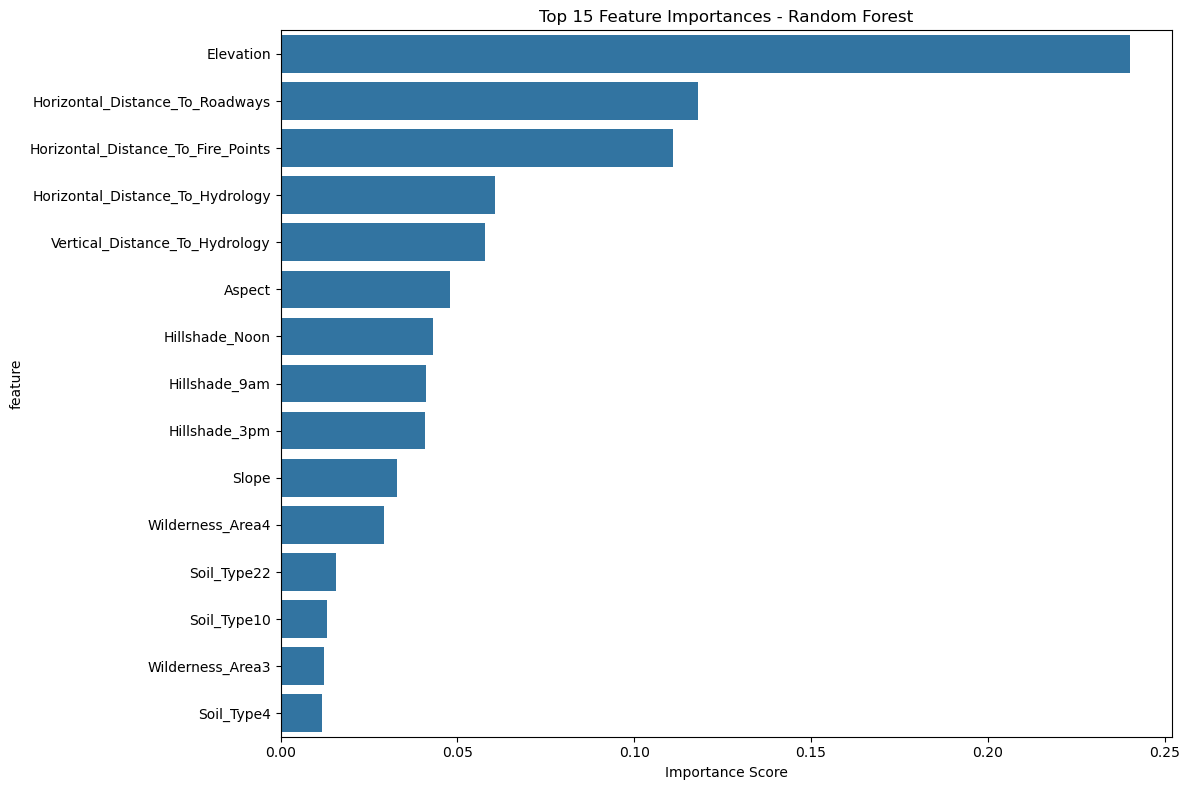

{'model': RandomForestClassifier(random_state=42),
 'predictions': array([1, 3, 3, ..., 1, 2, 2]),
 'accuracy': 0.9533316695782381,
 'precision': 0.946272720197186,
 'recall': 0.9052626798932254,
 'f1_score': 0.9240692940764312,
 'feature_importance':                                feature  importance
 0                            Elevation    0.240072
 5      Horizontal_Distance_To_Roadways    0.118071
 9   Horizontal_Distance_To_Fire_Points    0.110950
 3     Horizontal_Distance_To_Hydrology    0.060759
 4       Vertical_Distance_To_Hydrology    0.057779
 1                               Aspect    0.048021
 7                       Hillshade_Noon    0.042969
 6                        Hillshade_9am    0.041077
 8                        Hillshade_3pm    0.040795
 2                                Slope    0.032945
 13                    Wilderness_Area4    0.029198
 35                         Soil_Type22    0.015798
 23                         Soil_Type10    0.013150
 12                  

In [30]:
train_random_forest(X, y, test_size=0.2, random_state=42, grid_search=False, balanced=None)

# 3.1.1 with unbalanced

In [ ]:
train_random_forest(X, y, test_size=0.2, random_state=42, grid_search=True, balanced=None)

Performing grid search using 8 CPU cores...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.546 total time= 3.0min
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.546 total time= 3.0min
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.541 total time= 3.0min
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.544 total time= 3.0min
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.536 total time= 3.0min
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0

# 3.1.2 with balanced

In [ ]:
train_random_forest(X, y, test_size=0.2, random_state=42, grid_search=True, balanced=True)